In [3]:
# Importing the libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
# Loading the images
frame_1 = cv2.imread("./images/pacman_1.png")
frame_2 = cv2.imread("./images/pacman_2.png")
frame_3 = cv2.imread("./images/pacman_3.png")

In [5]:
# Converting BGR to RGB
frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB)
frame_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2RGB)
frame_3 = cv2.cvtColor(frame_3, cv2.COLOR_BGR2RGB)

In [ ]:
# Visualization
f, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
ax1.imshow(frame_1)
ax1.set_title("Frame 1")
ax2.imshow(frame_2)
ax2.set_title("Frame 2")
ax3.imshow(frame_3)
ax3.set_title("Frame 3")
plt.show()

In [67]:
# Parameters for "ShiThomasi Corner Detection"
feature_params = dict(maxCorners = 10,
                      qualityLevel = 0.2,
                      minDistance = 5,
                      blockSize = 5)

In [68]:
# Converting frames to grays scale
gray_1 = cv2.cvtColor(frame_1, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(frame_2, cv2.COLOR_RGB2GRAY)
gray_3 = cv2.cvtColor(frame_3, cv2.COLOR_RGB2GRAY)

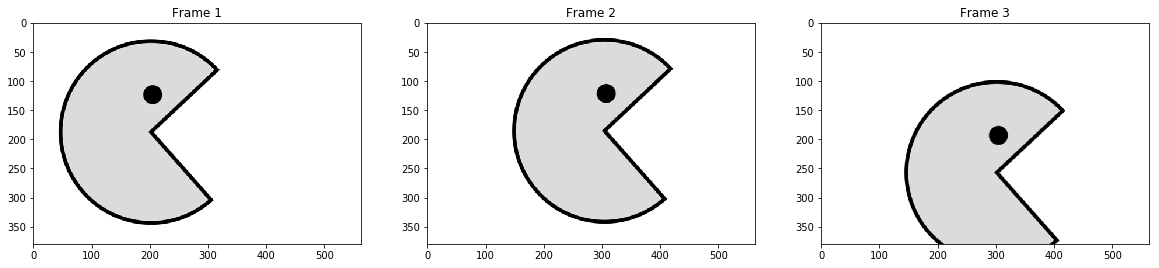

In [69]:
# Visualization
f, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
ax1.imshow(gray_1, cmap = "gray")
ax1.set_title("Frame 1")
ax2.imshow(gray_2, cmap = "gray")
ax2.set_title("Frame 2")
ax3.imshow(gray_3, cmap = "gray")
ax3.set_title("Frame 3")
plt.show()

In [70]:
# Finding the corners in the frame 1
points_1 = cv2.goodFeaturesToTrack(gray_1, mask = None, **feature_params)

In [71]:
points_1

array([[[318.,  82.]],

       [[308., 304.]],

       [[208., 188.]],

       [[309.,  81.]],

       [[299., 304.]],

       [[199., 188.]]], dtype=float32)

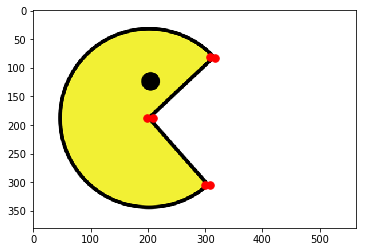

In [72]:
plt.imshow(frame_1)
for i in points_1:
    plt.plot(i[0][0], i[0][1], color = "red", marker = ".", markersize = 15)

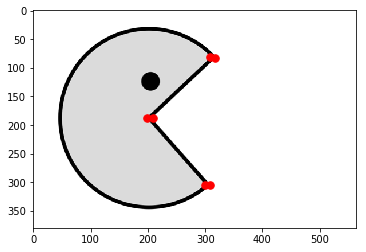

In [66]:
plt.imshow(gray_1, cmap = "gray")
for i in points_1:
    plt.plot(i[0][0], i[0][1], color = "red", marker = ".", markersize = 15)

<hr>

In [73]:
# Parameters for Lucas Kande optimal flow
params = dict(winSize = (5, 5),
              maxLevel = 2,
              criteria = (cv2.TermCriteria_EPS | cv2.TermCriteria_COUNT, 10, 0.3))

In [74]:
# CAlculating the optimal flow
points_2, match, error = cv2.calcOpticalFlowPyrLK(prevImg = gray_1, 
                                                  nextImg = gray_2, 
                                                  prevPts = points_1, 
                                                  nextPts = None,
                                                  **params)

In [75]:
points_2

array([[[248.43701,  82.75989]],

       [[242.67896, 299.76355]],

       [[175.74158, 186.66943]],

       [[353.19022,  83.4977 ]],

       [[341.16547, 306.67978]],

       [[290.14044, 193.08896]]], dtype=float32)

In [76]:
match

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [77]:
error

array([[134.92],
       [126.04],
       [100.92],
       [101.52],
       [113.4 ],
       [130.16]], dtype=float32)

In [79]:
# Select good matching points
good_old = points_1[match == 1]
good_new = points_2[match == 1]

In [85]:
# Creating a mask for drawing
mask = np.zeros_like(frame_1)

# Drawing a line between matching points
for index, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    # Drawing a point
    mask = cv2.circle(mask, (a, b), 5, (200), -1)
    # Draw motion vector (line)
    mask = cv2.line(mask, (a, b), (c, d), (200), 3)

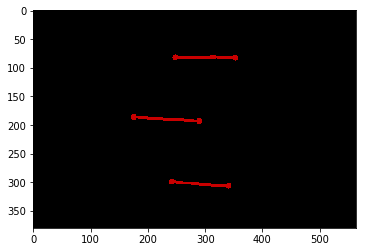

In [99]:
plt.imshow(mask)

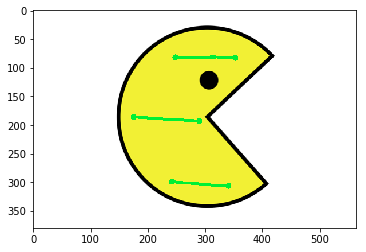

In [108]:
# Making a copy of frame 2
composition_img = np.copy(frame_2)

# 
composition_img[mask!=0] = [0]

plt.imshow(composition_img)